<font color="red" size="6">Filter Methods</font>
<p><font color="Yellow" size="4">4_Chi-Square Test (for categorical data)</font>

<b>To perform feature selection using the Chi-Square test for the Wine dataset, we will use the following steps:
<ol>
   <li> Load the Wine dataset.</li>
    <li>Use the Chi-Square test to assess the relationship between each feature and the target.</li>
    <li>Select the features that are most strongly related to the target using the Chi-Square test.</li></ol>

<b>The Chi-Square test is typically used for categorical data, so it’s important to ensure that our features are categorical or that we discretize continuous features appropriately.

In [1]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler


In [2]:
# Load the Wine dataset
wine = load_wine()
X = wine.data  # Features
y = wine.target  # Target variable

In [3]:
# Convert to DataFrame for better visualization
df = pd.DataFrame(X, columns=wine.feature_names)
df['Target'] = y

# Print the first few rows of the dataset
print("Wine Dataset:")
print(df.head())

Wine Dataset:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  Target

In [4]:
# Normalize the features to fit the requirements of the Chi-Square test (positive values only)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
# Apply the Chi-Square test
chi2_selector = SelectKBest(score_func=chi2, k='all')
X_new = chi2_selector.fit_transform(X_scaled, y)


In [6]:
# Display the Chi-Square scores for each feature
chi2_scores = chi2_selector.scores_
chi2_df = pd.DataFrame({"Feature": wine.feature_names, "Chi2 Score": chi2_scores}).sort_values(by="Chi2 Score", ascending=False)

print("\nChi-Square Test Scores:")
print(chi2_df)


Chi-Square Test Scores:
                         Feature  Chi2 Score
12                       proline   18.792035
11  od280/od315_of_diluted_wines   16.677678
6                     flavanoids   16.050977
9                color_intensity   12.453157
0                        alcohol    9.454001
5                  total_phenols    9.401770
10                           hue    8.449402
1                     malic_acid    8.118583
7           nonflavanoid_phenols    5.346082
8                proanthocyanins    3.981352
3              alcalinity_of_ash    3.319582
4                      magnesium    1.641313
2                            ash    0.934670


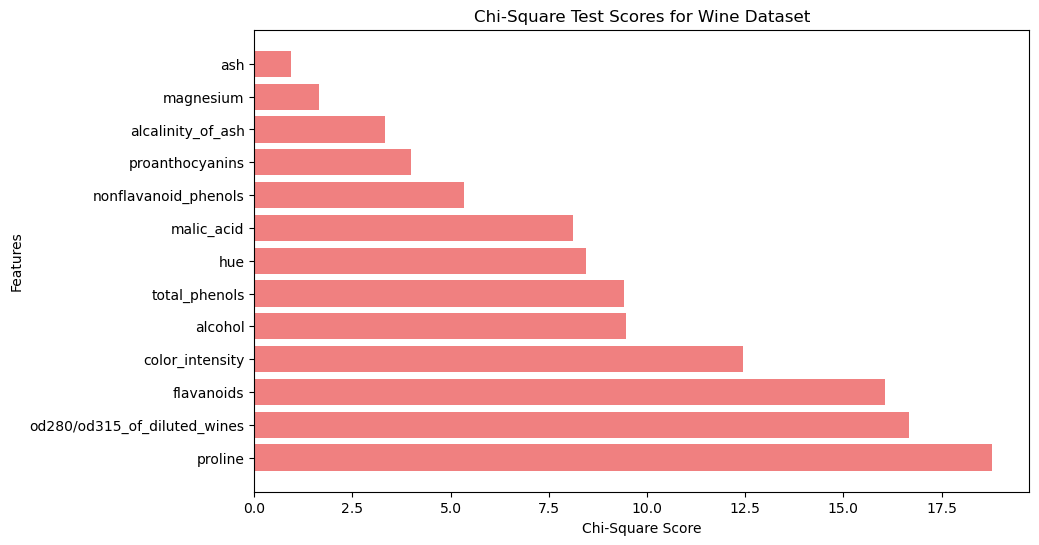

In [7]:
# Visualize the Chi-Square scores
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(chi2_df["Feature"], chi2_df["Chi2 Score"], color="lightcoral")
plt.title("Chi-Square Test Scores for Wine Dataset")
plt.xlabel("Chi-Square Score")
plt.ylabel("Features")
plt.show()

<b><font color="red">Expected Output:</font>

<li><font color="yellow">Chi-Square Test Scores:</font> The Chi-Square scores will tell us how strongly each feature is related to the target. Features with higher scores are more relevant.</li>
    <li><font color="yellow">Bar Plot:</font> A horizontal bar plot will show the Chi-Square scores for each feature, with longer bars indicating more significant features.</li>

<b><font color="red">Summary:</font>

The Chi-Square test is a useful method for evaluating the importance of categorical features when selecting features for classification tasks. Features with higher Chi-Square scores are more strongly associated with the target variable and should be considered more informative.

Example_2:IRIS_DATA_SET

Iris Dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Target  
0       0  
1       0  
2       0  
3       0  
4       0  

Chi-Square Test Scores:
             Feature  Chi2 Score
3   petal width (cm)   30.478068
2  petal length (cm)   26.861936
0  sepal length (cm)   11.377274
1   sepal width (cm)    4.470734


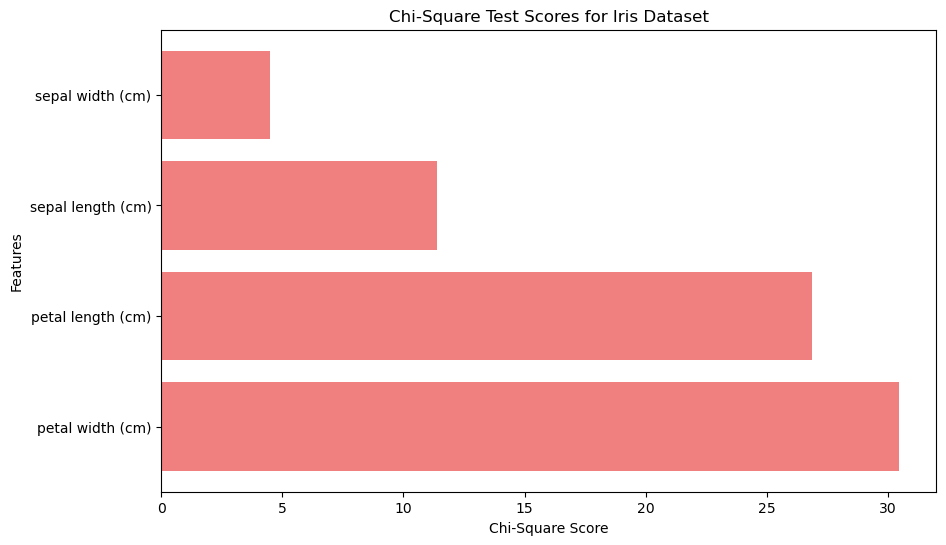

In [8]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable

# Convert to DataFrame for better visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['Target'] = y

# Print the first few rows of the dataset
print("Iris Dataset:")
print(df.head())

# Normalize the features to fit the requirements of the Chi-Square test (positive values only)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply the Chi-Square test using SelectKBest
chi2_selector = SelectKBest(score_func=chi2, k='all')
X_new = chi2_selector.fit_transform(X_scaled, y)

# Display the Chi-Square scores for each feature
chi2_scores = chi2_selector.scores_
chi2_df = pd.DataFrame({"Feature": iris.feature_names, "Chi2 Score": chi2_scores}).sort_values(by="Chi2 Score", ascending=False)

print("\nChi-Square Test Scores:")
print(chi2_df)

# Visualize the Chi-Square scores
plt.figure(figsize=(10, 6))
plt.barh(chi2_df["Feature"], chi2_df["Chi2 Score"], color="lightcoral")
plt.title("Chi-Square Test Scores for Iris Dataset")
plt.xlabel("Chi-Square Score")
plt.ylabel("Features")
plt.show()


<b>In this hypothetical output, petal length (cm) and petal width (cm) have the highest Chi-Square scores, indicating that they are the most informative features with respect to the target variable (iris species).

<b><font color="pink">Conclusion:</font>

<li>Chi-Square Test helps identify which features are more relevant in predicting the target variable.</li>
    <li>Features with higher Chi-Square scores are considered more informative.</li>
    <li>This method is useful for categorical features, but can also be applied to continuous features after normalization or discretization.</li>